In [33]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [34]:
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [35]:
x_train.shape

(50000, 32, 32, 3)

In [36]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [37]:
y_train.shape

(50000, 1)

In [38]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
def plot_img(index):
  plt.figure(figsize = (10,1))
  plt.imshow(x_train[index])
  plt.title(classes[y_train[index][0]])

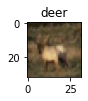

In [39]:
plot_img(3)

In [40]:
y_train[3]

array([4], dtype=uint8)

In [41]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255 

In [42]:
x_test_scaled

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [43]:
x_train.shape

(50000, 32, 32, 3)

In [44]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(2000, activation = 'relu'),
    keras.layers.Dense(500, activation= 'relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_scaled, y_train, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8181 - accuracy: 0.3537
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6313 - accuracy: 0.4252
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5525 - accuracy: 0.4497
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4932 - accuracy: 0.4719
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4455 - accuracy: 0.4907
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4042 - accuracy: 0.5043
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3663 - accuracy: 0.5190
Epoch 8/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3341 - accuracy: 0.5291
Epoch 9/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3024 - accuracy: 0.5436
Epoch 10/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.274

In [45]:
model.predict(x_test_scaled)[0]

array([3.7964916e-01, 5.2075434e-01, 8.8393044e-01, 9.9964237e-01,
       9.9157023e-01, 9.3739247e-01, 3.8594510e-02, 4.5401312e-04,
       4.2960253e-01, 1.8528053e-01], dtype=float32)

In [46]:
y_predicted = model.predict(x_test_scaled)
y_predicted = [np.argmax(i) for i in y_predicted]
y_predicted[:5]

[3, 8, 0, 8, 6]

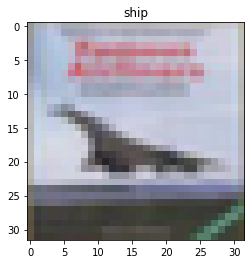

In [47]:
def plot_predicted(index):
  plt.imshow(x_test[index])
  plt.title(classes[y_predicted[index]])

plot_predicted(3)

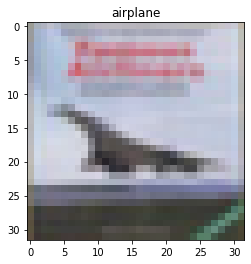

In [48]:
def plot_actual(index):
  plt.imshow(x_test[index])
  plt.title(classes[y_test[index][0]])

plot_actual(3)

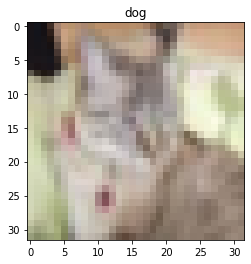

In [49]:
plot_predicted(8)

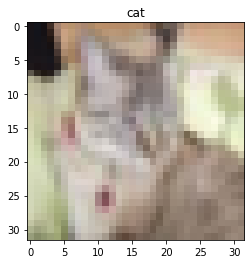

In [50]:
plot_actual(8)

In [51]:
model.evaluate(x_test_scaled,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.6098 - accuracy: 0.5517


[1.6098332405090332, 0.5516999959945679]

### Using categorical_crossentropy

In [67]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes = 10, dtype = 'float32'
)

y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [68]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes = 10, dtype = 'float32'
)

In [69]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(1500, activation = 'relu'),
    keras.layers.Dense(1000, activation= 'relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'SGD',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_scaled, y_train_categorical, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 6s 3ms/step - loss: 1.8283 - accuracy: 0.3475
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6389 - accuracy: 0.4213
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5575 - accuracy: 0.4497
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5018 - accuracy: 0.4706
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4513 - accuracy: 0.4896
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4085 - accuracy: 0.5018
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3717 - accuracy: 0.5173
Epoch 8/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3372 - accuracy: 0.5288
Epoch 9/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3058 - accuracy: 0.5399
Epoch 10/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.274

In [70]:
y_predicted = model.predict(x_test_scaled)
y_predicted = [np.argmax(i) for i in y_predicted]
y_predicted[:5]

[3, 8, 0, 0, 4]

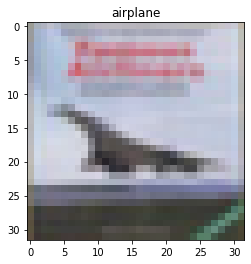

In [71]:
plot_predicted(3)

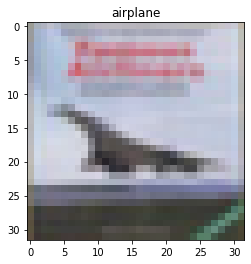

In [72]:
plot_actual(3)

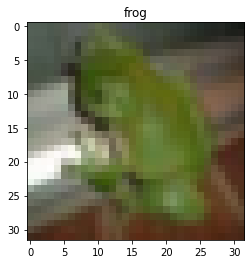

In [73]:
plot_predicted(7)

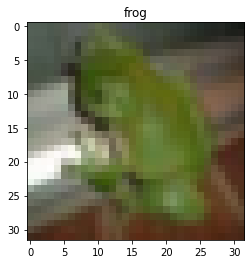

In [74]:
plot_actual(7)

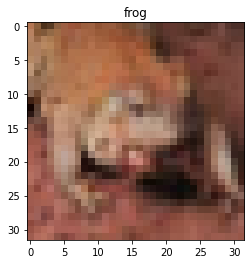

In [75]:
plot_predicted(5)

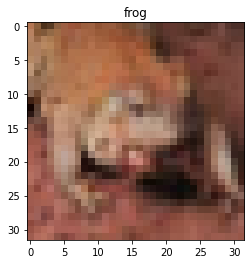

In [76]:
plot_actual(5)

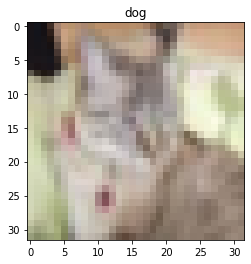

In [77]:
plot_predicted(8)

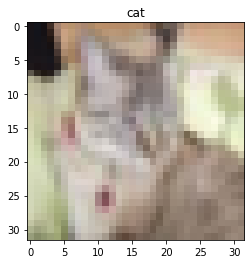

In [78]:
plot_actual(8)

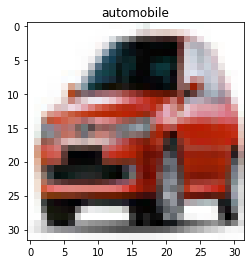

In [80]:
plot_predicted(231)

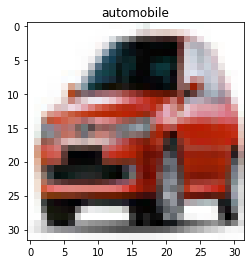

In [81]:
plot_actual(231)

In [82]:
model.evaluate(x_test_scaled,y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.5450 - accuracy: 0.5733


[1.5450091361999512, 0.5733000040054321]